In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

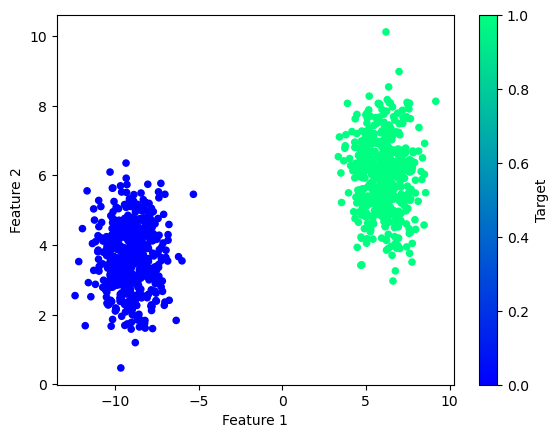

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [7]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
 dense_2 (Dense)             (None, 6)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [15]:
# Fit the model to the training data
new_fit_model = new_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 11/

<AxesSubplot:>

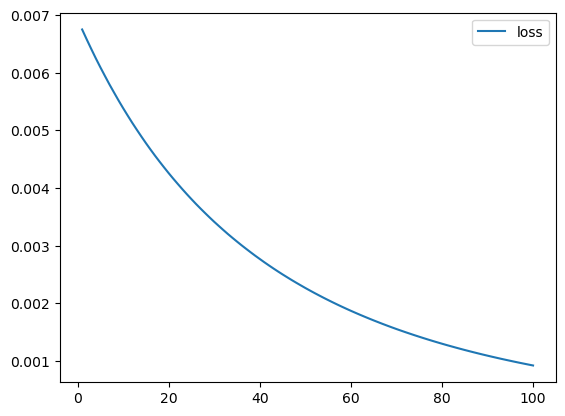

In [16]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(new_fit_model.history, index=range(1,len(new_fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

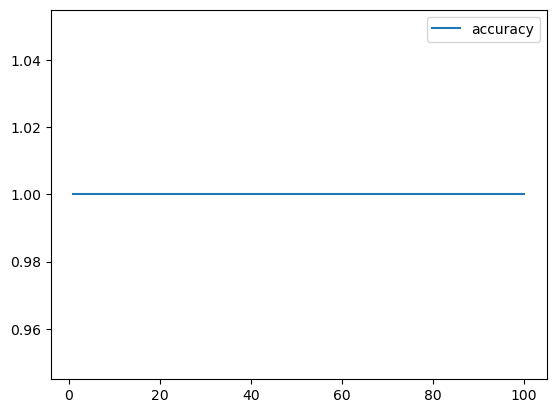

In [17]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = new_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 9.3121e-04 - accuracy: 1.0000 - 53ms/epoch - 7ms/step
Loss: 0.0009312058100476861, Accuracy: 1.0


## Predict

In [22]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)

(new_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 137ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

### 20.2.4 Nonlinear Neural Network

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

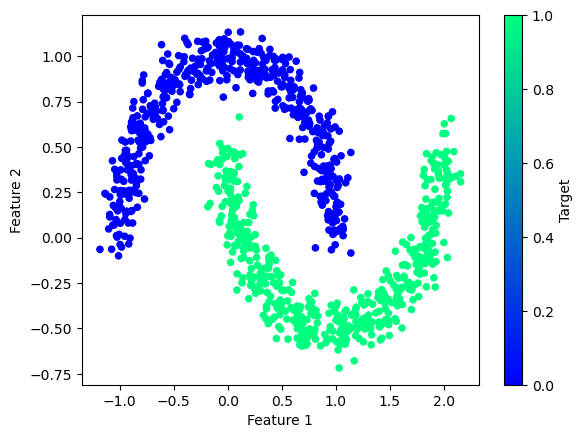

In [23]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [24]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [25]:
# Training the model with the nonlinear data
model_moon = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 2.0832 - accuracy: 0.5787
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.4050 - accuracy: 0.6613
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0342 - accuracy: 0.7053
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8168 - accuracy: 0.7400
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.7587
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.7813
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.8027
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8173
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8333
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8493
Epoch 11/

<AxesSubplot:>

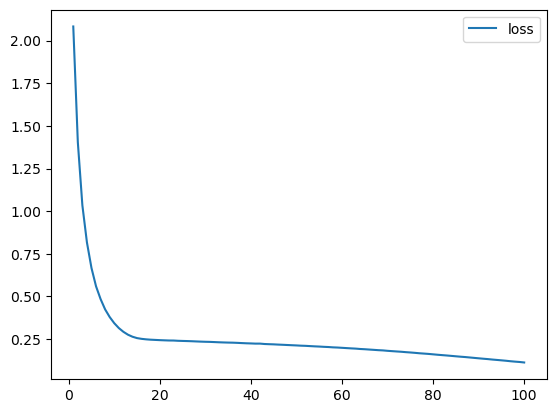

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

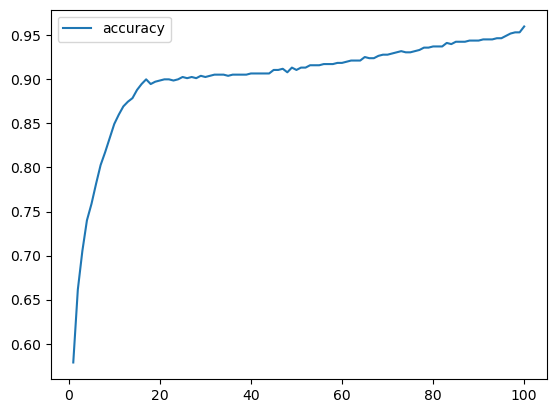

In [27]:
# Plot the accuracy
history_df.plot(y="accuracy")